In [8]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
x = torch.zeros([2,5])

In [3]:
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [4]:
x.shape

torch.Size([2, 5])

In [5]:
y = torch.rand([2,5])
y

tensor([[0.8007, 0.5176, 0.7638, 0.1204, 0.2922],
        [0.9587, 0.8376, 0.8036, 0.3869, 0.1507]])

In [6]:
#reshaping
#flattening

y = y.view([1,10])
y

tensor([[0.8007, 0.5176, 0.7638, 0.1204, 0.2922, 0.9587, 0.8376, 0.8036, 0.3869,
         0.1507]])

In [9]:
train = datasets.MNIST("",train=True, download = True, transform = transforms.Compose([transforms.ToTensor()]))


test = datasets.MNIST("",train=False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

0.1%

100.1%

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


2.5%5%

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


180.4%../torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw
Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [10]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
#batch - how many items at a time do we pass to a model


testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [11]:
#iterate
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [14]:
x, y = data[0][4], data[1][4]

print(y)

tensor(8)


In [16]:
import matplotlib.pyplot as plt

In [18]:
print(data[0][4].shape)

torch.Size([1, 28, 28])


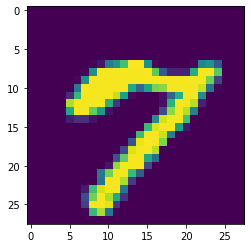

In [21]:
plt.imshow(data[0][5].view(28,28))

In [23]:
#check balance of data
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [24]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [25]:
import torch.nn as nn
import torch.nn.functional as F #you'll have to always parameters in function

In [28]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__() #initialize the parent class using super
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) #final output will be equal to number of classes
    
    def forward(self, x): #defines how the data will flow through the network
        x = F.relu(self.fc1(x)) #tells if the neuron is firing or not (value between 0-1)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim = 1) #log softmax will give us probability distribution

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [29]:
X = torch.rand((28,28))
X = X.view(-1, 28*28) #-1 specifies the batch can be of any size, else you specfiy the batch size


tensor([[0.0098, 0.2941, 0.3528, 0.1466, 0.3002, 0.0163, 0.4673, 0.9709, 0.2884,
         0.9012, 0.2445, 0.5313, 0.4748, 0.3627, 0.3412, 0.7369, 0.9975, 0.0184,
         0.1742, 0.5723, 0.5118, 0.9312, 0.5136, 0.7099, 0.8388, 0.1823, 0.0623,
         0.6783],
        [0.1752, 0.9895, 0.8069, 0.5180, 0.8805, 0.2260, 0.9596, 0.3437, 0.4300,
         0.2909, 0.9095, 0.5705, 0.2284, 0.5020, 0.5313, 0.2017, 0.9862, 0.5391,
         0.3112, 0.1813, 0.5322, 0.3014, 0.3203, 0.1452, 0.8551, 0.2437, 0.3650,
         0.9748],
        [0.5293, 0.0657, 0.8641, 0.5029, 0.1853, 0.3283, 0.0529, 0.8610, 0.7077,
         0.7729, 0.8558, 0.9478, 0.0654, 0.5087, 0.6108, 0.2821, 0.0462, 0.4402,
         0.1478, 0.5965, 0.3807, 0.7659, 0.7507, 0.8290, 0.6167, 0.6277, 0.1119,
         0.2441],
        [0.7953, 0.1342, 0.8838, 0.5232, 0.8684, 0.9617, 0.6607, 0.7962, 0.3779,
         0.5362, 0.0611, 0.0535, 0.8445, 0.9776, 0.9608, 0.2462, 0.9608, 0.4063,
         0.6109, 0.3152, 0.7175, 0.8365, 0.9794, 0.3690

In [31]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 0.001) #net.parameters correspond to all things that are adjustable
#learning ratedecides size of the step, decaying learning rate is helpful

EPOCHS = 3 #number of whole passes
for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of features and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output,y) #if data is not a one hot vector, then use nll_loss, else use mean squared error
        loss.backward() #backpropagate loss
        optimizer.step()
    print('loss',loss)
        

loss tensor(0.0118, grad_fn=<NllLossBackward>)
loss tensor(0.0095, grad_fn=<NllLossBackward>)
loss tensor(0.3851, grad_fn=<NllLossBackward>)


In [32]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("accuracy:", round(correct/total,3))

accuracy: 0.979


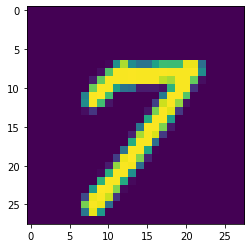

In [36]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28,28))
plt.show()

In [37]:
print(torch.argmax(net(X[3].view(-1,784))[0]))

tensor(7, grad_fn=<NotImplemented>)
